---
## Question 1
---

Define a procedure called "check_input" that takes an input as a square list of lists (2D Matrix of N x N) and returns a boolen "true" if the input is valid or "false" otherwise, according to the following criteria.

1. Each coloumn must contain numbers from between 1 and N, with no duplicates.
2. Each row must contain numbers from between 1 and N, with no duplicates.

In [ ]:
# define procedure here
def check_input(arr):
    n = len(arr)
    p=True
    for j in range(0,n):
        for i in range(0,n-1):
            c = arr[i][j]
            for k in range(i+1,n):
                if (c == arr[k][j]):
                    p=False
    return p


In [ ]:
# run this block to test code after defining the procedure

test1 = [[1, 2, 3],
        [2, 3, 1],
        [3, 1, 2]]

test2 = [[1, 2, 3, 4],
        [2, 3, 1, 3],
        [3, 1, 2, 3],
        [4, 4, 4, 4]]

test3 = [['a', 'b', 'c'],
        ['b', 'c', 'a'],
        ['c', 'a', 'b']]

print(check_input(test1)) # must return true
print(check_input(test2)) # must return false
print(check_input(test3)) # must return true

True
False
True


---
## Question 2
---

**Part A** - Import the file "StudentMarkSheet.csv" as a Pandas DataFrame and print the information for the dataframe

In [ ]:
import pandas as pd
df = pd.read_csv('StudentMarkSheet.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student name  200 non-null    object 
 1   Exam name     199 non-null    object 
 2   Exam date     200 non-null    object 
 3   Marks         197 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.4+ KB


**Part B** - Remove any rows that do not contain all the data. Also print the following information.

1. Number of rows before
2. Number of rows containing null data
3. Number of rows after

In [ ]:
new_df = df.dropna()
new_df
befor_row=len(df)
print("Number of rows before= ",befor_row)
after_row=len(new_df)
print("Number of rows after= ",after_row)
null_rows=befor_row-after_row
print("Number of rows containing null data= ",null_rows)

Number of rows before=  200
Number of rows after=  196
Number of rows containing null data=  4


**Part C** - Print all the marks along with the subject for the student named "James Walker"

In [ ]:
df.set_index("Student name", inplace = True)
r=df.loc["James Walker"]
print(r)

                Exam name   Exam date  Marks
Student name                                
James Walker      Biology  05/06/2016   31.0
James Walker    Chemistry  15/06/2016   61.0
James Walker  Mathematics  29/07/2016   23.0
James Walker      Physics  10/06/2016  100.0
James Walker    Sociology  21/06/2016   73.0


---
## Question 3
---

**Part A** - From the DataFrame created in Question 2, calculate the average marks for each subject

In [ ]:
import pandas as pd
df = pd.read_csv('StudentMarkSheet.csv')
df.set_index("Exam name", inplace = True)
r=df.loc["Biology"]
r1=r['Marks'].mean()
r=df.loc["Physics"]
r2=r['Marks'].mean()
r=df.loc["Sociology"]
r3=r['Marks'].mean()
r=df.loc["Philosophy"]
r4=r['Marks'].mean()
r=df.loc["Mathematics"]
r5=r['Marks'].mean()
r=df.loc["Chemistry"]
r6=r['Marks'].mean()
print("Average of Biology= ",r1)
print("Average of Physics= ",r2)
print("Average of Sociology= ",r3)
print("Average of Philosophy= ",r4)
print("Average of Mathematics= ",r5)
print("Average of Chemistry= ",r6)

Average of Biology=  47.89473684210526
Average of Physics=  51.76190476190476
Average of Sociology=  56.026315789473685
Average of Philosophy=  47.270270270270274
Average of Mathematics=  48.97222222222222
Average of Chemistry=  50.57692307692308


**Part B** - Using the averages you just calculated, plot a Bar Graph showing the average marks of each subject

<BarContainer object of 1 artists>

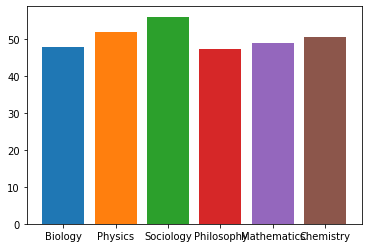

In [ ]:
from matplotlib import pyplot as plt
plt.bar('Biology',r1)
plt.bar('Physics',r2)
plt.bar('Sociology',r3)
plt.bar('Philosophy',r4)
plt.bar('Mathematics',r5)
plt.bar('Chemistry',r6)

---
## Question 4
---

**Part A** - Import the file "CatData.csv" and preprocess it to remove any null values

In [ ]:
from re import S
import pandas as pd



df = pd.read_csv('CatData.csv')
new_df = df.dropna()
new_df

,Tail Length (cm),Mass (kg)
0,18.1,3.750
1,18.6,3.800
2,19.5,3.250
3,19.3,3.450
4,19.0,3.650
...,...,...
337,20.7,4.000
338,20.2,3.400
339,19.3,3.775
340,21.0,4.100


**Part B** - Identify the independant and dependant variables (comment answer below)

In [ ]:
X = df['Mass (kg)']  #independent
y= df['Tail Length (cm)']  #dependent 

**Part C** - Create a linear regression model using sklearn and fit it to the data you just imported


In [ ]:
from sklearn import linear_model
import numpy as np
data=df[["Mass (kg)","Tail Length (cm)"]]
num=int(len(df)*0.8)
train_data=df[:num]
test_data=df[num:]
print("Data:",len(df))
print("Train:",len(train_data))
print("Test:",len(test_data))
regr=linear_model.LinearRegression()
train_x=np.array(train_data[["Mass (kg)"]])
train_y=np.array(train_data[["Tail Length (cm)"]])
regr.fit(train_x,train_y)

Data: 342
Train: 273
Test: 69


LinearRegression()

**Part D** - Print the values for slope and y-intercept

In [ ]:
import numpy as np
def simple_linear_regression(n,m):
  xi=n
  yi=m
  n=len(xi)
  xi_mean=xi.mean()
  yi_mean=yi.mean()
  s_xi=(xi).sum()
  s_yi=(yi).sum()
  s_xiyi=((xi*yi).sum())*n
  s_xi_s_yi=s_xi*s_yi
  s_xixi=((xi*xi).sum())*n
  s_xi_square=s_xi*s_xi
  slope=(s_xiyi-s_xi_s_yi)/(s_xixi-s_xi_square)
  intercept=yi_mean-slope*xi_mean
  return slope,intercept
  actual_slope,actual_inter=simple_linear_regression(df['Mass (kg)'],df['Tail Length (cm)'])
  regr=linear_model.LinearRegression()
train_x=np.array(train_data[["Mass (kg)"]])
train_y=np.array(train_data[["Tail Length (cm)"]])

regr.fit(train_x,train_y)

coefficients = regr.coef_
intercept = regr.intercept_
print("Slope:",coefficients)
print("Intercept",intercept)

Slope: [[1.59183664]]
Intercept [13.34657289]


**Part E** - Plot a scatter graph of the original data and a regression line on the same figure (example with dummy data shown below)

![](https://drive.google.com/uc?export=view&id=1o_NAsNjfx7zAh9m-UjvWB3rta6uraKdY)

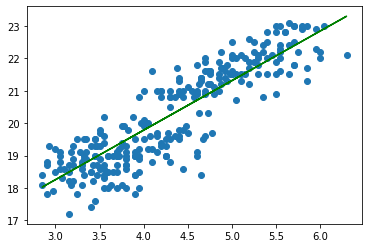

In [ ]:
import matplotlib.pyplot as plt
actual_slope,actual_inter=simple_linear_regression(df['Mass (kg)'],df['Tail Length (cm)'])
plt.scatter(train_data["Mass (kg)"],train_data["Tail Length (cm)"])
plt.plot(train_data['Mass (kg)'],actual_slope*train_data['Mass (kg)']+actual_inter,color="green")
